# 그래프1 - 대한민국 총 예산 중 환경부 예산 비중 변화

## 재정데이터 Open API 데이터 로드 및 데이터 전처리

In [20]:
import pandas as pd
import requests

from bs4 import BeautifulSoup

In [6]:
url = f"http://openapi.openfiscaldata.go.kr/ExpenditureBudgetInit3?FSCL_YY=2021&pIndex=2"

In [92]:
pIndex = 1
rows = []
years = ['2019', '2020', '2021']

key = "CHANGE ME"

# 데이터 받아오기
try:
    for year in years:
        print(year + "년도 예산 데이터 받아오는중...")
        pIndex = 1
        
        for _ in range(10):
            url = f"http://openapi.openfiscaldata.go.kr/ExpenditureBudgetInit3?FSCL_YY={year}&pSize=1000&Key={key}&pIndex={pIndex}"
            
            res = requests.get(url)
            soup = BeautifulSoup(res.content, 'html.parser')

            for i in soup.find_all('row'):
                rows.append({"FSCL_YY": i.fscl_yy.string,
                             "OFFC_NM": i.offc_nm.string,
                             "Y_YY_MEDI_KCUR_AMT": i.y_yy_medi_kcur_amt.string,
                             "Y_YY_DFN_MEDI_KCUR_AMT": i.y_yy_dfn_medi_kcur_amt.string})
            pIndex += 1
            
        print("완료")

except requests.exceptions.RequestException as e:
    print(e)
            
budget_df = pd.DataFrame(rows)
budget_df.columns = ["회계년도", "소관명", "정부안금액(천원)", "국회확정금액(천원)"]

2019년도 예산 데이터 받아오는중...
완료!!
2020년도 예산 데이터 받아오는중...
완료!!
2021년도 예산 데이터 받아오는중...
완료!!


In [93]:
budget_df.shape

(24716, 4)

In [94]:
budget_df

,회계년도,소관명,정부안금액(천원),국회확정금액(천원)
0,2019,대통령비서실 및 국가안보실,40443000,40443000
1,2019,대통령비서실 및 국가안보실,19431000,19431000
2,2019,대통령비서실 및 국가안보실,16392000,16392000
3,2019,대통령비서실 및 국가안보실,4491000,4491000
4,2019,대통령비서실 및 국가안보실,4782000,4782000
...,...,...,...,...
24711,2021,가습기살균제사건과 4・16세월호참사 특별조사위원회,691000,691000
24712,2021,가습기살균제사건과 4・16세월호참사 특별조사위원회,2371000,2371000
24713,2021,5・18민주화운동 진상규명조사위원회,2493000,2493000
24714,2021,5・18민주화운동 진상규명조사위원회,3672000,3672000


In [153]:
# 예산 데이터 타입 변환
budget_df = budget_df.astype({'정부안금액(천원)': 'int64', '국회확정금액(천원)': 'int64'})

In [154]:
group_df = budget_df

In [155]:
group_df = group_df.groupby(["회계년도", "소관명"], as_index=False)["정부안금액(천원)", "국회확정금액(천원)"].sum()

<ipython-input-155-fcab90a143d6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_df = test_df.groupby(["회계년도", "소관명"], as_index=False)["정부안금액(천원)", "국회확정금액(천원)"].sum()


In [156]:
budget_2019 = group_df[group_df['회계년도'] == '2019']
budget_2020 = group_df[group_df['회계년도'] == '2020']
budget_2021 = group_df[group_df['회계년도'] == '2021']

In [157]:
budget_2019

,회계년도,소관명,정부안금액(천원),국회확정금액(천원)
0,2019,가습기살균제사건과 4・16세월호참사 특별조사위원회,0,20785000
1,2019,감사원,132882000,132418000
2,2019,경찰청,11048391000,11024182000
3,2019,고용노동부,42500102000,41631922000
4,2019,공정거래위원회,131459000,131295000
5,2019,과학기술정보통신부,19396435000,19427590000
6,2019,관세청,566060000,551334400
7,2019,교육부,87804629000,87587577000
8,2019,국가보훈처,6290360000,6328135000
9,2019,국가인권위원회,36970000,36683000


## 시각화

In [158]:
import matplotlib.pyplot as plt

In [162]:
labels_2019 = budget_2019['소관명']
money_2019 = budget_2019['국회확정금액(천원)']

labels_2020 = budget_2020['소관명']
money_2020 = budget_2020['국회확정금액(천원)']

labels_2021 = budget_2021['소관명']
money_2021 = budget_2021['국회확정금액(천원)']

In [164]:
def drawPieChart(labels, budget):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot()
    pie = ax.pie(budget, autopct='%.1f%%', startangle=260, counterclock=False, pctdistance=1.1, textprops={'fontsize': 20})
    plt.rc('font', family='Malgun Gothic')
    plt.legend(labels, loc='upper right', bbox_to_anchor=(1.5, 1))
    plt.show()

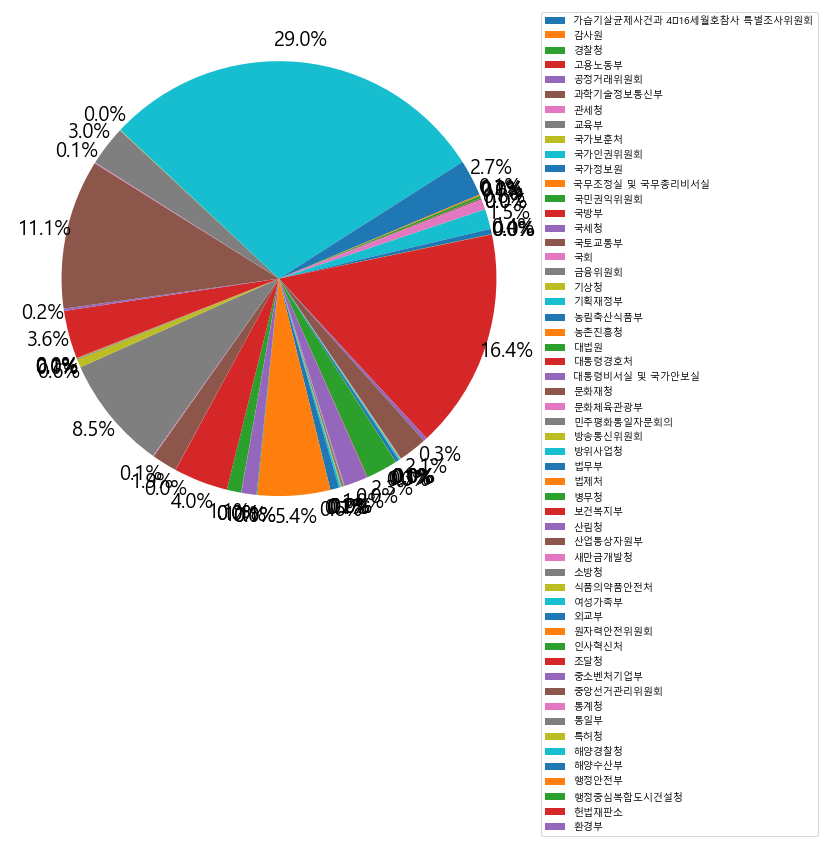

In [165]:
drawPieChart(labels_2019, money_2019)

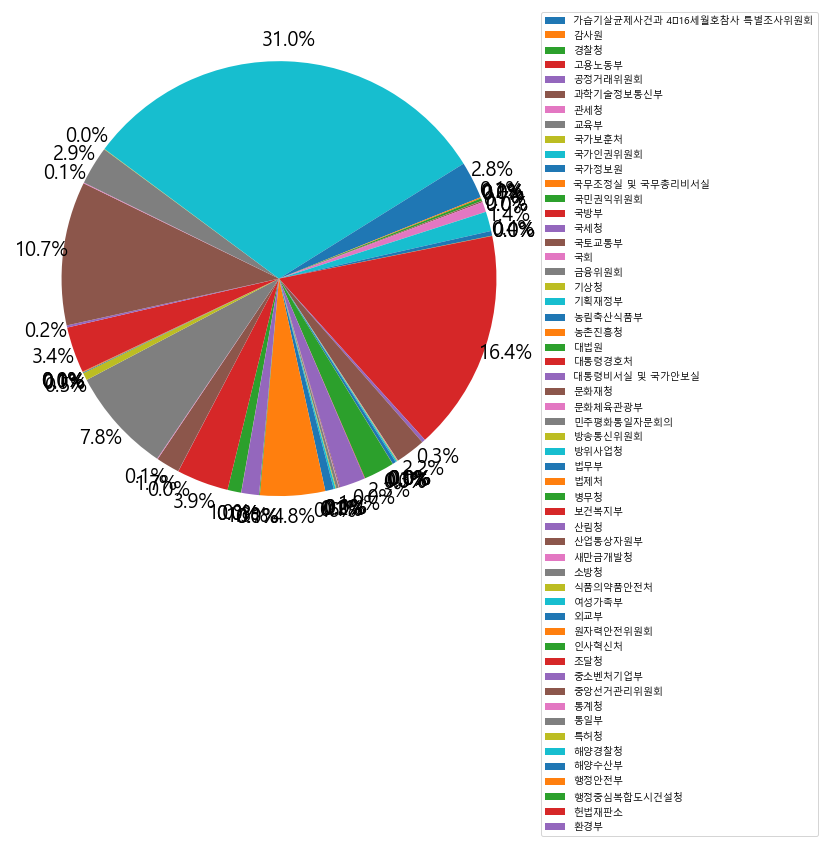

In [166]:
drawPieChart(labels_2020, money_2020)

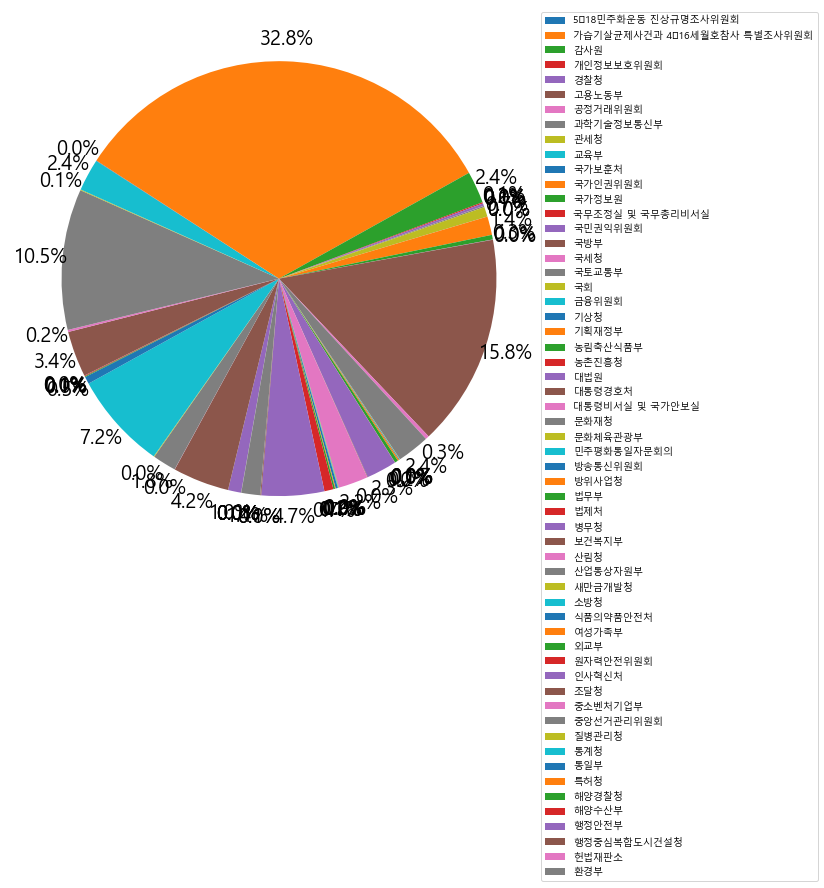

In [167]:
drawPieChart(labels_2021, money_2021)